In [1]:
import pandas as pd 
from pandas.io.json import json_normalize

In [34]:
# Import refugee data 
# DRC
df = pd.read_json("data/refugees to DRC.json")
df_drc = json_normalize((df.loc['timeseries', 'data']))
df_drc['data_date'] = pd.to_datetime(df_drc['data_date'])

# Ethiopa
df = pd.read_json("data/refugees to Ethiopia.json")
df_ethiopia = json_normalize((df.loc['timeseries', 'data']))
df_ethiopia['data_date'] = pd.to_datetime(df_ethiopia['data_date'])

# Kenya
df = pd.read_json("data/refugees to Kenya.json")
df_kenya = json_normalize((df.loc['timeseries', 'data']))
df_kenya['data_date'] = pd.to_datetime(df_kenya['data_date'])

# Sudan
df = pd.read_json("data/refugees to Sudan.json")
df_sudan = json_normalize((df.loc['timeseries', 'data']))
df_sudan['data_date'] = pd.to_datetime(df_sudan['data_date'])

# Uganda,
df = pd.read_json("data/refugees to Uganda.json")
df_uganda = json_normalize((df.loc['timeseries', 'data']))
df_uganda['data_date'] = pd.to_datetime(df_uganda['data_date'])
df_uganda['data_date'] = df_uganda['data_date'] + pd.offsets.MonthBegin(0)
df_uganda['data_date'] = df_uganda['data_date'].dt.strftime('%Y-%m')

dates = pd.concat([df_drc[['data_date']],df_ethiopia[['data_date']],df_kenya[['data_date']],df_sudan[['data_date']], df_uganda[['data_date']] ])

# dates = dates['data_date'].drop_duplicates().sort_values()

df_uganda.head()







,data_date,individuals,unix_timestamp
0,2013-01,12524,1356912000
1,2014-01,25274,1388448000
2,2014-04,118051,1396224000
3,2014-07,142766,1404086400
4,2014-10,150181,1412035200


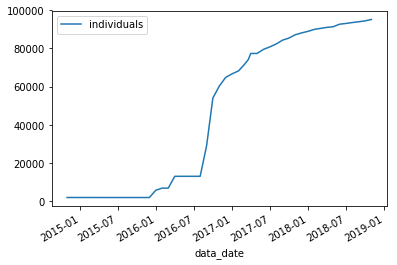

In [35]:
plt = df_drc.plot(x='data_date', y='individuals')

# plt = df_ethiopia.plot(x='data_date', y='individuals', ax=plt)

# plt = df_kenya.plot(x='data_date', y='individuals', ax=plt)

# plt = df_sudan.plot(x='data_date', y='individuals', ax=plt)

# plt = df_uganda.plot(x='data_date', y='individuals', ax=plt)

# plt.legend(['DRC', 'Ethiopia', 'Kenya', 'Sudan', 'Uganda'])



In [57]:
df_incidents = pd.read_csv("data/incidents.csv", delimiter=';')
df_incidents['fatalities'] = df_incidents.fatalities.fillna(0)
df_incidents['event_date'] = pd.to_datetime(df_incidents['event_date'])

df_incidents.head()


,event_id_no_cnty,event_date,event_type,actor1,inter1,actor2,inter2,country,location,fatalities
0,5333.0,2018-09-11,Violence against civilians,Aluakluak Communal Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Akot,2.0
1,5332.0,2018-06-11,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Wau,1.0
2,5330.0,2018-02-11,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,2.0,Government of South Sudan (2011-),1.0,South Sudan,Juba,0.0
3,5331.0,2018-02-11,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Tirangore,0.0
4,5328.0,2018-10-31,Violence against civilians,Murle Ethnic Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Jalle,0.0


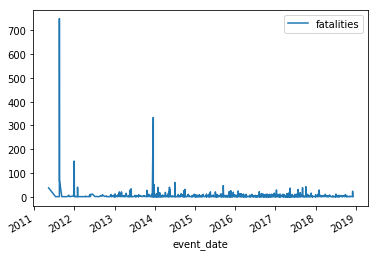

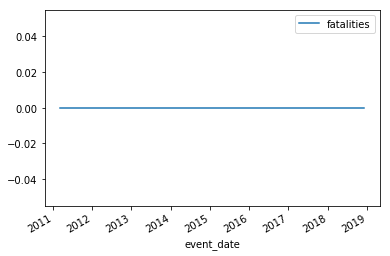

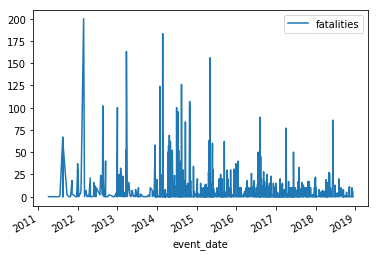

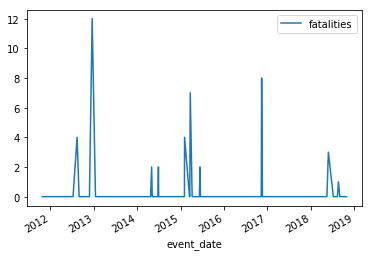

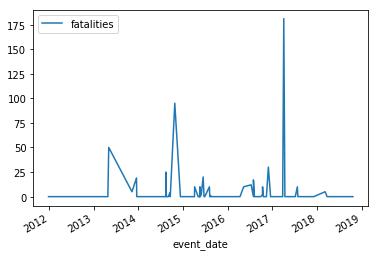

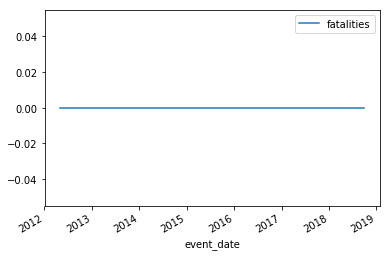

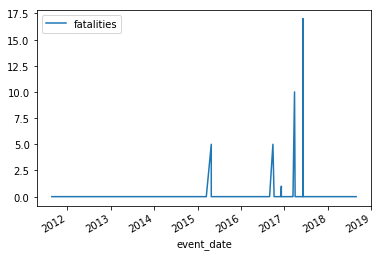

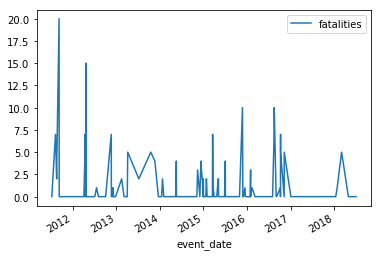

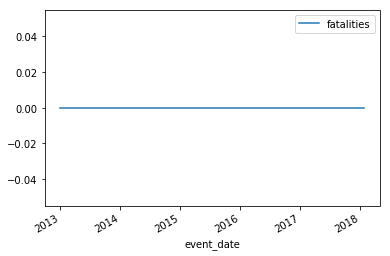

In [58]:
arr_event = []
for item in pd.unique(df_incidents['event_type']):
    df_tmp = df_incidents.loc[df_incidents['event_type'] == item]
    arr_event.append(df_tmp)
    
for item in arr_event:
    item.plot(x='event_date', y='fatalities')


In [48]:
df_incidents['event_date'] = pd.to_datetime(df_incidents['event_date'])
df_incidents['event_date'] = df_incidents['event_date'] + pd.offsets.MonthBegin(0)
df_incidents['event_date'] = df_incidents['event_date'].dt.strftime('%Y-%m')

df_incidents.head()

,event_id_no_cnty,event_date,event_type,actor1,inter1,actor2,inter2,country,location,fatalities
0,5333.0,2018-10,Violence against civilians,Aluakluak Communal Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Akot,2.0
1,5332.0,2018-07,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Wau,1.0
2,5330.0,2018-03,Strategic development,SPLA/M-In Opposition: Sudanese Peoples Liberat...,2.0,Government of South Sudan (2011-),1.0,South Sudan,Juba,0.0
3,5331.0,2018-03,Violence against civilians,Unidentified Armed Group (South Sudan),3.0,Civilians (South Sudan),7.0,South Sudan,Tirangore,0.0
4,5328.0,2018-11,Violence against civilians,Murle Ethnic Militia (South Sudan),4.0,Civilians (South Sudan),7.0,South Sudan,Jalle,0.0


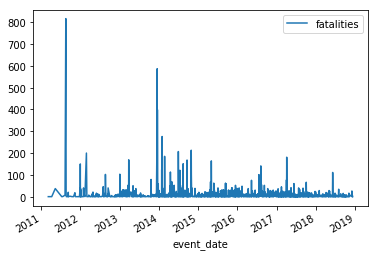

In [60]:
df_agg  = df_incidents[['event_date', 'fatalities']]
df_agg2 = df_agg.groupby('event_date').sum()
df_agg2.head()
df_agg2.plot()


In [62]:
# Import food data
df_food = pd.read_csv("data/wfp_food_prices_south-sudan.csv")
df_food = df_food.drop(df_food.index[0])
df_food['date'] = pd.to_datetime(df_food['date'])
df_food['price'] = pd.to_numeric(df_food['price'])
#df_food['cmname'] = df_food['cmname'].astype('|S')

df_food.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2012-01-15,Fuel (diesel) - Retail,L,non-food,7.9063,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
2,2012-02-15,Fuel (diesel) - Retail,L,non-food,7.2750,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
3,2012-03-15,Fuel (diesel) - Retail,L,non-food,7.4531,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
4,2012-04-15,Fuel (diesel) - Retail,L,non-food,8.1719,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN
5,2012-05-15,Fuel (diesel) - Retail,L,non-food,11.9688,SSP,South Sudan,NaN,0,National Average,1199.0,284,15.0,15.0,8,1199_284_15_15,NaN


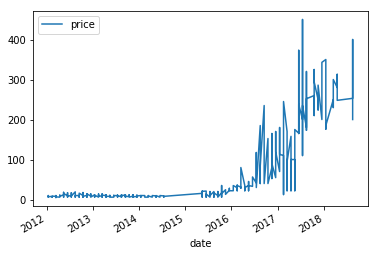

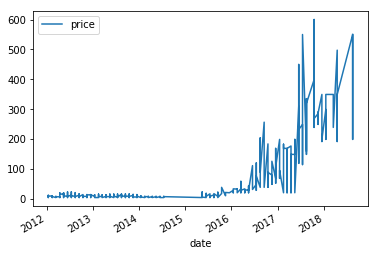

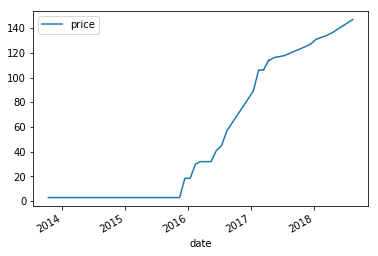

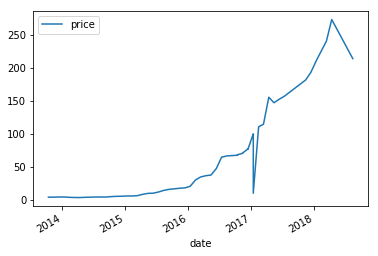

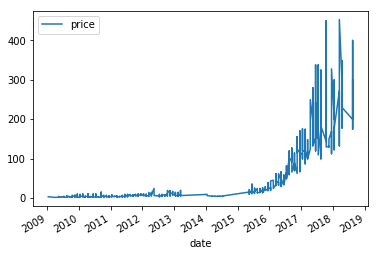

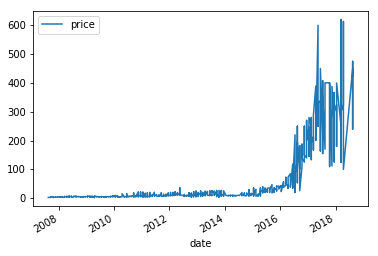

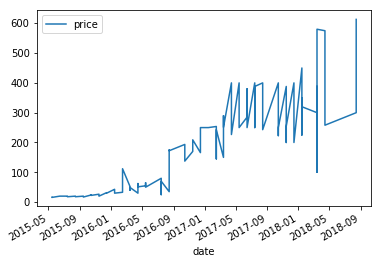

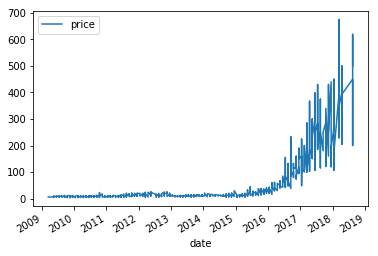

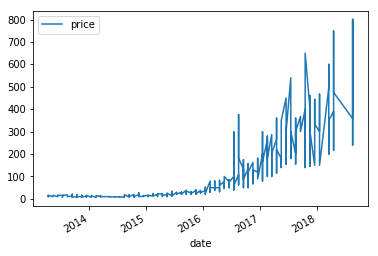

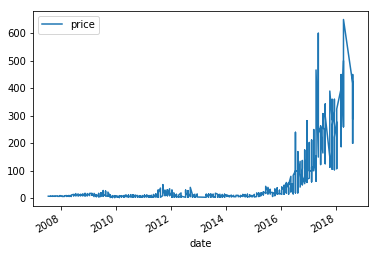

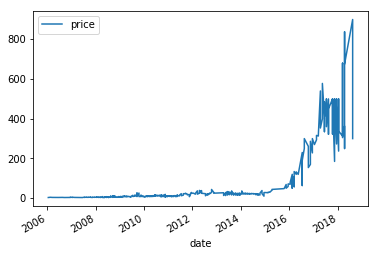

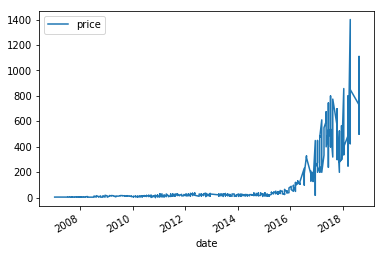

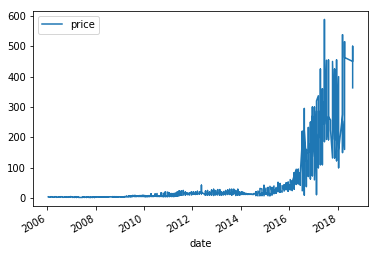

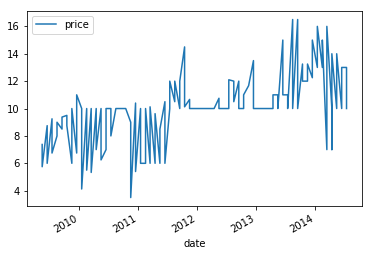

In [67]:
foodarray = []
df_laatste = df_food
for item in pd.unique(df_food['cmname']):
    df_tmp = df_food.loc[df_food['cmname'] == item]
    df_laatste = df_tmp
    if df_tmp.shape[0] > 50:
        foodarray.append(df_tmp)
    
for item in foodarray:
    item.plot(x='date', y='price')

#fig, ax = plt.subplots()
